# Load library and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

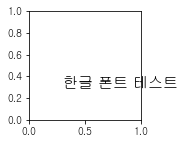

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## Test
plt.figure(figsize=(2,2))
plt.text(0.3, 0.3, '한글 폰트 테스트', size=15)
plt.show() 

In [14]:
# 개요 페이지
dat = pd.read_csv(r'C:/Users/cny13/OneDrive/바탕 화면/빅콘/segmentation용 데이터/customer_log_ver2.csv')   

In [16]:
print('shape:',dat.shape)
print('users:',dat.user_id.nunique())

shape: (2507971, 17)
users: 479773


In [17]:
#형 변환
dat['date_cd'] = pd.to_datetime(dat['date_cd'])
dat.sort_values('date_cd')

,user_id,date_cd,mp_os,Session,how_long,visit_cumsum,visit_rate,OpenApp,Login,StartLoanApply,ViewLoanApplyIntro,CompleteIDCertification,EndLoanApply,UseDSRCalc,UseLoanManage,UsePrepayCalc,GetCreditInfo
80583,28520,2022-03-01,iOS,1,1,0.0,0.000000,1,1,1,1,1,1,0,0,0,0
1219304,428746,2022-03-01,Android,1,1,0.0,0.000000,1,1,0,0,0,0,0,1,0,1
379631,133305,2022-03-01,unknown,1,1,0.0,0.000000,1,1,0,0,0,0,0,0,0,1
1010283,355462,2022-03-01,Android,1,1,0.0,0.000000,1,1,1,1,1,1,0,0,0,0
240770,83383,2022-03-01,iOS,1,1,0.0,0.000000,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895016,314971,2022-05-31,iOS,2,89,5.0,0.056180,1,1,1,1,1,1,0,0,0,0
895015,314971,2022-05-31,iOS,1,89,5.0,0.056180,1,1,1,1,1,1,0,0,0,0
1859678,651968,2022-05-31,iOS,1,30,2.0,0.066667,1,1,2,2,1,1,0,0,0,0
895007,314967,2022-05-31,iOS,3,91,7.0,0.076923,1,1,2,2,2,2,0,0,0,0


In [19]:
dat.isna().sum()

user_id                    0
date_cd                    0
mp_os                      0
Session                    0
how_long                   0
visit_cumsum               0
visit_rate                 0
OpenApp                    0
Login                      0
StartLoanApply             0
ViewLoanApplyIntro         0
CompleteIDCertification    0
EndLoanApply               0
UseDSRCalc                 0
UseLoanManage              0
UsePrepayCalc              0
GetCreditInfo              0
dtype: int64

In [ ]:
user = pd.read_csv(r'C:/Users/cny13/OneDrive/바탕 화면/빅콘/user_spec.csv')   

In [ ]:
dat2 = dat.copy()
user2 = user.copy()

# 로그 파생변수 만들기

In [ ]:
#행동 sum 변수 만들기
dat2['CompleteIDCertification_sum'] = dat2.groupby('user_id')['CompleteIDCertification'].transform(sum)
dat2['EndLoanApply_sum'] = dat2.groupby('user_id')['EndLoanApply'].transform(sum)
dat2['GetCreditInfo_sum'] = dat2.groupby('user_id')['GetCreditInfo'].transform(sum)
dat2['Login_sum'] = dat2.groupby('user_id')['Login'].transform(sum)
dat2['OpenApp_sum'] = dat2.groupby('user_id')['OpenApp'].transform(sum)
dat2['StartLoanApply_sum'] = dat2.groupby('user_id')['StartLoanApply'].transform(sum)
dat2['UseDSRCalc_sum'] = dat2.groupby('user_id')['UseDSRCalc'].transform(sum)
dat2['UseLoanManage_sum'] = dat2.groupby('user_id')['UseLoanManage'].transform(sum)
dat2['UsePrepayCalc_sum'] = dat2.groupby('user_id')['UsePrepayCalc'].transform(sum)
dat2['ViewLoanApplyIntro_sum'] = dat2.groupby('user_id')['ViewLoanApplyIntro'].transform(sum)

In [ ]:
lst = list(user2['user_id'].unique())

In [ ]:
yes_user = dat2.loc[dat2['user_id'].isin(lst)]
only_log = dat2.loc[~dat2['user_id'].isin(lst)]

# 전체 유저

In [ ]:
print(dat2['OpenApp_sum'].sum())
print(dat2['Login_sum'].sum())
print(dat2['ViewLoanApplyIntro_sum'].sum())
print(dat2['StartLoanApply_sum'].sum())
print(dat2['CompleteIDCertification_sum'].sum())
print(dat2['EndLoanApply_sum'].sum())
print(dat2['UseLoanManage_sum'].sum())
print(dat2['UsePrepayCalc_sum'].sum())
print(dat2['UseDSRCalc_sum'].sum())
print(dat2['GetCreditInfo_sum'].sum())

63033153
52162721
45471804
42858578
39420076
38238183
27016089
121758
76678
39538874


/Users/kyongwonkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


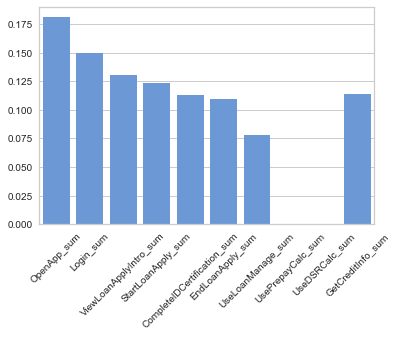

In [ ]:
x = ['OpenApp_sum','Login_sum','ViewLoanApplyIntro_sum','StartLoanApply_sum','CompleteIDCertification_sum',
     'EndLoanApply_sum', 'UseLoanManage_sum','UsePrepayCalc_sum', 'UseDSRCalc_sum', 
     'GetCreditInfo_sum']
y = [63033153/347937914,52162721/347937914, 45471804/347937914,42858578/347937914,
     39420076/347937914,38238183/347937914,27016089/347937914,121758/347937914,
     76678/347937914,39538874/347937914]

qualitative_colors = sns.color_palette('Set3')
sns.set_palette(qualitative_colors)
sns.barplot(x,y, color ='#5B97E6')
plt.xticks(rotation = 45)
plt.show();



In [ ]:
y = [63033153,52162721, 45471804,42858578,39420076,38238183,27016089,121758,76678,39538874]
sum(y)

347937914

# only_log: 신청서를 안 쓴 유저

In [ ]:
only_log.head()

,user_id,date_cd,mp_os,Session,how_long,visit_cumsum,visit_rate,OpenApp,Login,StartLoanApply,...,GetCreditInfo_sum,Login_sum,OpenApp_sum,StartLoanApply_sum,UseDSRCalc_sum,UseLoanManage_sum,UsePrepayCalc_sum,ViewLoanApplyIntro_sum,monetary2,frequency2
32,21,2022-04-18,Android,1,1,0.0,0.000000,1,1,0,...,4,5,5,1,0,2,0,1,18,0.4
33,21,2022-04-20,Android,1,3,1.0,0.333333,1,1,0,...,4,5,5,1,0,2,0,1,18,0.4
34,21,2022-04-22,Android,1,5,2.0,0.400000,1,1,0,...,4,5,5,1,0,2,0,1,18,0.4
35,21,2022-05-04,Android,1,17,3.0,0.176471,1,1,1,...,4,5,5,1,0,2,0,1,18,0.4
36,21,2022-05-04,Android,2,17,3.0,0.176471,1,1,0,...,4,5,5,1,0,2,0,1,18,0.4


In [ ]:
only_log.columns

Index(['user_id', 'date_cd', 'mp_os', 'Session', 'how_long', 'visit_cumsum',
       'visit_rate', 'OpenApp', 'Login', 'StartLoanApply',
       'ViewLoanApplyIntro', 'CompleteIDCertification', 'EndLoanApply',
       'UseDSRCalc', 'UseLoanManage', 'UsePrepayCalc', 'GetCreditInfo',
       'CompleteIDCertification_sum', 'EndLoanApply_sum', 'GetCreditInfo_sum',
       'Login_sum', 'OpenApp_sum', 'StartLoanApply_sum', 'UseDSRCalc_sum',
       'UseLoanManage_sum', 'UsePrepayCalc_sum', 'ViewLoanApplyIntro_sum',
       'monetary2', 'frequency2'],
      dtype='object')

In [ ]:
cols = ['user_id','CompleteIDCertification_sum','EndLoanApply_sum', 'GetCreditInfo_sum', 'Login_sum', 'OpenApp_sum',
       'StartLoanApply_sum', 'UseDSRCalc_sum', 'UseLoanManage_sum',
       'UsePrepayCalc_sum', 'ViewLoanApplyIntro_sum']

temp = only_log[cols]

In [ ]:
print(only_log['OpenApp_sum'].sum())
print(only_log['Login_sum'].sum())
print(only_log['ViewLoanApplyIntro_sum'].sum())
print(only_log['StartLoanApply_sum'].sum())
print(only_log['CompleteIDCertification_sum'].sum())
print(only_log['EndLoanApply_sum'].sum())
print(only_log['UseLoanManage_sum'].sum())
print(only_log['UsePrepayCalc_sum'].sum())
print(only_log['UseDSRCalc_sum'].sum())
print(only_log['GetCreditInfo_sum'].sum())


4724423
4092510
465350
239237
66755
2956
2112677
9425
5775
3460765


/Users/kyongwonkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


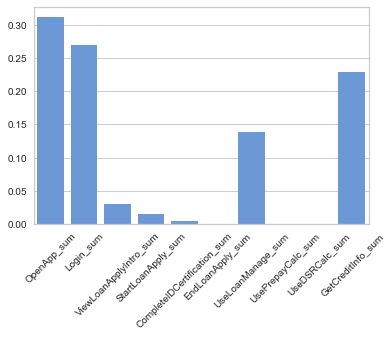

In [ ]:
x = ['OpenApp_sum','Login_sum','ViewLoanApplyIntro_sum','StartLoanApply_sum','CompleteIDCertification_sum',
     'EndLoanApply_sum', 'UseLoanManage_sum','UsePrepayCalc_sum', 'UseDSRCalc_sum', 
     'GetCreditInfo_sum']
y = [4724423/15179873, 4092510/15179873, 465350/15179873,
     239237/15179873,66755/15179873, 2956/15179873,2112677/15179873, 
     9425/15179873, 5775/15179873,3460765/15179873 ]

qualitative_colors = sns.color_palette('Set3')
sns.set_palette(qualitative_colors)
sns.barplot(x,y, color ='#5B97E6')
plt.xticks(rotation = 45)
plt.show();


# yes_user: 신청서 쓴 유저

In [ ]:
print(yes_user['OpenApp_sum'].sum())
print(yes_user['Login_sum'].sum())
print(yes_user['ViewLoanApplyIntro_sum'].sum())
print(yes_user['StartLoanApply_sum'].sum())
print(yes_user['CompleteIDCertification_sum'].sum())
print(yes_user['EndLoanApply_sum'].sum())
print(yes_user['UseLoanManage_sum'].sum())
print(yes_user['UsePrepayCalc_sum'].sum())
print(yes_user['UseDSRCalc_sum'].sum())
print(yes_user['GetCreditInfo_sum'].sum())

58308730
48070211
45006454
42619341
39353321
38235227
24903412
112333
70903
36078109


/Users/kyongwonkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


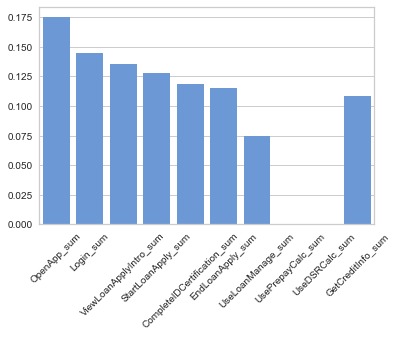

In [ ]:
x = ['OpenApp_sum','Login_sum','ViewLoanApplyIntro_sum','StartLoanApply_sum','CompleteIDCertification_sum',
     'EndLoanApply_sum', 'UseLoanManage_sum','UsePrepayCalc_sum', 'UseDSRCalc_sum', 
     'GetCreditInfo_sum']
y = [58308730/332758041,48070211/332758041,45006454/332758041,42619341/332758041,
     39353321/332758041,38235227/332758041,24903412/332758041,112333/332758041,
     70903/332758041,36078109/332758041]

qualitative_colors = sns.color_palette('Set3')
sns.set_palette(qualitative_colors)
sns.barplot(x,y, color ='#5B97E6')
plt.xticks(rotation = 45)
plt.show();

In [ ]:
y = [58308730,48070211,45006454,42619341,39353321,38235227,24903412,112333,70903,36078109]

sum(y)

332758041